<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/polyhedron-gdl/unibo-intensive-program-2024/blob/main/1-notebooks/chapter-08-03.ipynb">
        <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

# Deep Learning in Unsupervised Learning

## Generative Adversarial Networks (GANs)

### Introduction

- Generative Adversarial Networks (GANs) represent one of the most important development in the field of artificial intelligence, particularly in the domain of generative modeling. 

- Introduced by Ian Goodfellow and his colleagues in 2014, GANs have revolutionized the way machines can generate realistic images, texts, and other forms of data. 

- The essence of GANs lies in their unique architecture and training methodology, which involves a dueling process between two neural networks: the Generator and the Discriminator.


<center>
    
<img src="./pics/ch-08-03-00.jpg" width="500" height="400">
</center>

### Architecture of GANs

The architecture of a GAN is composed of two main components: the Generator and the Discriminator, each playing a distinct role in the generative process.

1. **Generator**: The Generator network takes random noise as input and transforms it into data that resemble the target distribution. The goal of the Generator is to produce outputs indistinguishable from real data, essentially "fooling" the Discriminator. It learns to generate more realistic data over time as it adjusts its parameters based on the feedback from the Discriminator.

2. **Discriminator**: The Discriminator network acts as a classifier, tasked with distinguishing between real data (from the training set) and fake data produced by the Generator. It is trained to improve its accuracy in detecting the Generator's outputs as fake.

These two networks engage in a continuous game, with the Generator striving to produce increasingly convincing data, while the Discriminator becomes better at distinguishing real from fake. This adversarial process drives the improvement of both networks, leading to the generation of highly realistic data.

### Training Phase

Training a GAN involves alternating between training the Discriminator and the Generator, with both networks being updated based on their performance in each iteration.

1. **Training the Discriminator**: In this step, the Discriminator is trained with a batch of real data labeled as real and a batch of fake data generated by the Generator, labeled as fake. The goal is to maximize its accuracy in correctly classifying real and fake data. This is typically done using a binary cross-entropy loss function.

2. **Training the Generator**: After updating the Discriminator, the Generator is trained. The key difference here is that the Generator's output is passed to the Discriminator, and the Generator is updated based on how well the Discriminator was able to distinguish its output from real data. The Generator's objective is to minimize the chance of the Discriminator correctly identifying its outputs as fake.



### Backpropagation of Error During Training

The backpropagation algorithm plays a crucial role in updating the weights of both the Generator and Discriminator networks. During the training phase, backpropagation is used to calculate the gradients of the loss function with respect to the network parameters, allowing for the optimization of these parameters.

1. **For the Discriminator**, backpropagation calculates the gradient of the loss function that measures its ability to distinguish between real and fake data. The weights are then updated to improve its classification accuracy.

2. **For the Generator**, the process is slightly more complex because its success is measured by the Discriminator's failure to recognize its outputs as fake. Thus, the gradient of the Discriminator's loss function with respect to the Generator's weights is computed, essentially "tricking" the Discriminator. The Generator's weights are updated to produce outputs that are more likely to be classified as real by the Discriminator.

This iterative process of backpropagation and updating continues until a stopping criterion is met, which could be a certain number of iterations or when the Discriminator's accuracy reaches a specific threshold, indicating that the Generator produces sufficiently realistic data.

### Generative Vs Discriminative Models

- If you have delved into neural networks, it's probable that the majority of the examples you encountered utilized ***discriminative*** models. Conversely, generative adversarial networks belong to a distinct category known as ***generative*** models.

- Discriminative models are typically employed for most tasks involving supervised learning, whether for classification or regression. Consider a scenario where the objective is to develop a model capable of identifying handwritten digits ranging from 0 to 9. In this case, one would employ a dataset comprising images of handwritten digits, each tagged with a label that denotes the represented digit.

- Throughout the model training phase, an algorithm would be applied to tweak the model's parameters. The aim here is to reduce a loss function to a minimum, enabling the model to grasp the ***probability distribution of the output based on the given input***. Once the training is completed, the model can then be used to identify new images of handwritten digits by predicting the digit that most likely matches the input, as depicted in the following illustration:

<center>
    
<img src="./pics/ch-08-03-01.jpg" width="700" height="600">
</center>

*image source: RealPython see References and Credits Section*

- You can think of discriminative models for classification tasks as structures that leverage training data to identify the dividing lines between different classes. These models then apply these learned boundaries to distinguish an input and assign it to a specific category. 

- In terms of mathematics, discriminative models are adept at **learning the conditional probability $P(y \vert x)$**, which is the probability of the output y given the input x.

- Beyond neural networks, discriminative models can also take the form of logistic regression models and support vector machines (SVMs).

- On the other side, generative models such as GANs are developed to model the way a dataset is produced through a probabilistic framework. By drawing samples from a generative model, it becomes possible to create new pieces of data. While discriminative models find their application in supervised learning, generative models are typically employed with datasets that do not have labels, representing a type of unsupervised learning.

- For instance, using a dataset of handwritten digits, a generative model could be trained to produce new digit images. During its training, an algorithm would be utilized to refine the model’s parameters with the aim of reducing a loss function and capturing the probability distribution of the dataset. Following the training, this model would be capable of generating new digit samples.

<center>
    
<img src="./pics/ch-08-03-02.jpg" width="700" height="600">
</center>

*image source: RealPython see References and Credits Section*

- Generative models typically incorporate a stochastic, or random, factor to produce new samples. 

- This randomness is essential for the variety in the samples created by the model. The random inputs fueling the generator come from what is known as a latent space, where the vectors serve as a condensed version of the samples that are generated.

- In contrast to discriminative models, generative models are focused on learning the **probability $P(x)$** of the input data $x$. With this understanding of the input data's distribution, they have the capability to generate new instances of data.

### A Simple Toy Model

- As we have already said, generative adversarial networks consist of an overall structure composed of two neural networks, one called the generator and the other called the discriminator.

- The role of the generator is to estimate the probability distribution of the real samples in order to provide generated samples resembling real data. The discriminator, in turn, is trained to estimate the probability that a given sample came from the real data rather than being provided by the generator.

- These structures are called generative adversarial networks because the generator and discriminator are trained to compete with each other: the generator tries to get better at fooling the discriminator, while the discriminator tries to get better at identifying generated samples.

- To understand how GAN training works, consider a toy example with a dataset composed of two-dimensional samples $(x_1, x_2)$, with $x_1$ in the interval from $0$ to $2\pi$ and $x_2 = \sin(x_1)$.

<center>
    
<img src="./pics/ch-08-03-03.jpg" width="700" height="600">
</center>

To train D, at each iteration you label some real samples taken from the training data as 1 and some generated samples provided by G as 0. This way, you can use a conventional supervised training framework to update the parameters of D in order to minimize a loss function, as shown in the following scheme:

<center>
    
<img src="./pics/ch-08-03-04.jpg" width="700" height="600">
</center>

For each batch of training data containing labeled real and generated samples, you update the parameters of D to minimize a loss function. After the parameters of D are updated, you train G to produce better generated samples. The output of G is connected to D, whose parameters are kept frozen, as depicted here:

<center>
    
<img src="./pics/ch-08-03-05.jpg" width="700" height="600">
</center>

Now that you know how GANs work, you’re ready to implement your own using PyTorch...

First of all as usual we have to import python libraries. The `torch` library and its neural network module `nn`, along with the `math` and `matplotlib.pyplot` libraries. `torch` is a popular deep learning library offering rich functionalities for tensor operations, automatic differentiation, and neural network design. The `nn` module within `torch` provides essential building blocks for creating neural networks, such as layers and activation functions. The `math` library is used for mathematical functions, and `matplotlib.pyplot` is a plotting library for visualizing data, which is useful for tasks like displaying the results of model training or data analysis.

In [2]:
import torch
from torch import nn

import math
import matplotlib.pyplot as plt

The code `torch.manual_seed(111)` sets the seed for generating random numbers in PyTorch to `111`. This ensures that the random numbers generated by PyTorch functions are deterministic and reproducible across runs of the program. Setting a manual seed is crucial for experiments where reproducibility is necessary, as it ensures that the random elements of the computations (such as weight initialization in neural networks) are consistent each time the code is executed.

In [3]:
torch.manual_seed(123)

**Preparing the Training Data**

Now we are going to create a dataset for a PyTorch training session, where the objective is to learn the sine function from its input. The following code initializes a dataset with 1024 samples (`train_data_length`), where each sample has two dimensions. The first dimension is randomly generated angles (in radians), and the second dimension is the sine of these angles. In other words, the training data is composed of pairs $(x_1, x_2)$ so that $x_2$ consists of the value of the sine of $x_1$ for $x_1$ in the interval from $0$ to $2\pi$. Labels for this dataset are initialized to zeros (`train_labels`), although they're not used further in this snippet. Finally, it creates a list of tuples (`train_set`), where each tuple contains a data point and its corresponding label, ready for use in training a model.

In [4]:
# Set the total number of data points in the training set
train_data_length = 1024

# Initialize a tensor of zeros with shape (1024, 2) to hold the training data
train_data = torch.zeros((train_data_length, 2))

# Populate the first column of train_data with random angles between 0 and 2π
train_data[:, 0] = 2 * math.pi * torch.rand(train_data_length)

# Calculate the sine of the angles (first column) and store the results in the second column
train_data[:, 1] = torch.sin(train_data[:, 0])

# Initialize a tensor of zeros to serve as labels for the training data. Note that 
# the tensor of labels, is required by PyTorch’s data loader. Since GANs make use 
# of unsupervised learning techniques, the labels can be anything. They won’t be used, after all.
train_labels = torch.zeros(train_data_length)

# Combine the training data and labels into a list of tuples, creating the final training dataset
train_set = [
    (train_data[i], train_labels[i]) for i in range(train_data_length)
]

You can examine the training data by plotting each point

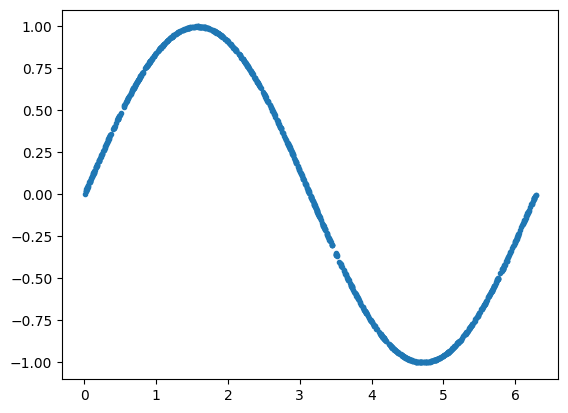

In [5]:
plt.plot(train_data[:, 0], train_data[:, 1], ".")

Now we initialize a DataLoader for the training data with a specified batch size of 32. The DataLoader is a PyTorch utility that provides an iterable over the given dataset (`train_set` in this case), allowing for easy access to batches of data. The `batch_size` parameter defines how many samples per batch to load, and `shuffle=True` ensures that the data is shuffled at every epoch, which helps in reducing model overfitting by providing a more generalized learning.

In [6]:
batch_size = 32
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=batch_size, shuffle=True
)

>**Note**. *A PyTorch DataLoader is a powerful tool designed to simplify data manipulation during the training of neural networks. It allows you to efficiently manage datasets by automating data batching, shuffling, and distribution across multiple processes. DataLoaders are particularly useful when dealing with large datasets that cannot fit into memory, as they enable seamless and on-the-fly data loading and transformation, thereby optimizing the training process and improving model performance*. 

>*For a detailed understanding of PyTorch DataLoaders, the official PyTorch documentation is the best reference. It provides comprehensive insights into DataLoader functionalities, including examples and guidelines on how to customize data loading for different scenarios. This resource is invaluable for developers looking to leverage DataLoaders for efficient data handling in neural network training. Visit the [PyTorch DataLoader documentation](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for more information*.

**Implementing the Discriminator**

In PyTorch, to build neural network models, you create classes derived from `nn.Module`. This approach requires you to define a class for the discriminator, following principles of Object-Oriented Programming (OOP) in Python 3. The discriminator, designed to differentiate between real and generated data, accepts 2D inputs to output a probability indicating if the input is from the actual dataset. The following example illustrates constructing such a discriminator model.

In [7]:
# Define the Discriminator class which is a subclass of nn.Module
class Discriminator(nn.Module):
    def __init__(self):
        # Initialize the superclass nn.Module
        super().__init__()
        
        # Construct the neural network model
        self.model = nn.Sequential(
            # First linear layer taking a 2D input and outputting 256 features
            nn.Linear(2, 256),
            # ReLU activation function to introduce non-linearity
            nn.ReLU(),
            # Dropout layer to prevent overfitting by randomly setting input units to 0 with a probability of 0.3
            nn.Dropout(0.3),
            # Second linear layer reducing the feature size from 256 to 128
            nn.Linear(256, 128),
            # ReLU activation function
            nn.ReLU(),
            # Another dropout layer for regularization
            nn.Dropout(0.3),
            # Third linear layer reducing the feature size from 128 to 64
            nn.Linear(128, 64),
            # ReLU activation function
            nn.ReLU(),
            # Final dropout layer
            nn.Dropout(0.3),
            # Final linear layer reducing the feature size from 64 to 1
            nn.Linear(64, 1),
            # Sigmoid activation function to output a probability between 0 and 1
            nn.Sigmoid(),
        )

    # Define the forward pass through the network
    def forward(self, x):
        # Pass the input x through the sequential model and return the output
        output = self.model(x)
        return output

For more detailed explanations and tutorials on how to use PyTorch's `nn.Module` to create models, you can refer to the [official PyTorch documentation](https://pytorch.org/docs/stable/nn.html). This resource provides comprehensive guidance on building neural networks with PyTorch, including various modules and functions available within the framework.

In [8]:
discriminator = Discriminator()

**Implementing the Generator**

As we have explained, in Generative Adversarial Networks (GANs), the generator is a neural model designed to produce data similar to the training set, using inputs sampled from a latent space. In our example, this involves a model that takes two-dimensional random vectors as input and outputs data points aiming to mimic the real dataset. Like the discriminator's setup, creating a generator involves defining a Generator class that extends `nn.Module`, encapsulating the network's architecture. Subsequently, an instance of this Generator class is created for use.

In [9]:
# Define the Generator class which inherits from nn.Module
class Generator(nn.Module):
    def __init__(self):
        super().__init__()  # Initialize the superclass (nn.Module)
        # Define the model architecture using a Sequential container
        self.model = nn.Sequential(
            nn.Linear(2, 16),  # First linear transformation from 2D input to 16D
            nn.ReLU(),         # ReLU activation function for non-linearity
            nn.Linear(16, 32), # Second linear transformation from 16D to 32D
            nn.ReLU(),         # Another ReLU activation function
            nn.Linear(32, 2),  # Final linear transformation from 32D back to 2D
        )

    # Define the forward pass method
    def forward(self, x):
        output = self.model(x)  # Pass the input x through the sequential model
        return output           # Return the model output

# Instantiate the Generator class
generator = Generator()

**Training the Models**

Before training the models, you need to set up some parameters to use during training:

In [10]:
# sets the learning rate (lr), which you’ll use to adapt the network weights
lr            = 0.001
# sets the number of epochs (num_epochs), which defines how many repetitions 
# of training using the whole training set will be performed.
num_epochs    = 1000
#  assigns the variable loss_function to the binary cross-entropy function BCELoss(), 
# which is the loss function that you’ll use to train the models.
loss_function = nn.BCELoss()

>**REMIND** *Binary Cross Entropy (BCE) is a loss function used in binary classification tasks in neural networks. It measures the difference between the true labels and the predicted probabilities of the positive class. BCE encourages the model to output probabilities close to 0 or 1, penalizing predictions that are confident but wrong. It's particularly useful for models ending with a sigmoid activation function, optimizing the parameters to minimize the discrepancy between actual and predicted labels, thus guiding the training towards more accurate predictions*.

These lines initialize optimizers for both the discriminator and generator models in a GAN setup using the Adam optimization algorithm. Each optimizer is configured to update the respective model's parameters with a learning rate defined by `lr`. The `discriminator.parameters()` and `generator.parameters()` methods collect all trainable parameters of each model, allowing the optimizer to adjust them during training to minimize the models' loss functions.

>**REMIND** *The Adam optimization algorithm is a method used to update the weights in neural networks more efficiently. It combines ideas from two other optimizations - RMSprop and Momentum - to calculate adaptive learning rates for each parameter. Adam is particularly useful for large datasets and high-dimensional spaces because of its efficient computation of gradient descent, making it faster and more precise in reaching the minimum loss. This makes Adam a popular choice for training deep learning models, especially when dealing with complex data and neural network architectures. For a deeper understanding of the Adam optimization algorithm and its practical applications, you might find the original paper by Diederik P. Kingma and Jimmy Ba, "Adam: A Method for Stochastic Optimization", to be a valuable resource. [Here](https://towardsdatascience.com/the-math-behind-adam-optimizer-c41407efe59b) you can find a deep dive into the math of this method. Additionally, the TensorFlow and PyTorch documentation provide excellent overviews and implementation details that are useful for applying Adam in deep learning projects*.

In [13]:
optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr)
optimizer_generator     = torch.optim.Adam(generator.parameters(), lr=lr)

Finally, you need to implement a training loop for the Generative Adversarial Network, iterating through epochs to train both the discriminator and generator models. It processes batches of real and generated samples, updating model weights to minimize respective loss functions. The discriminator learns to differentiate real data from fake, while the generator aims to produce increasingly realistic samples. Losses are calculated using a specified loss function and backpropagated to update the models. Progress is logged at intervals, showing the discriminator's and generator's loss at the end of certain epochs.

>**NOTE** *The `zero_grad()` function in PyTorch is used to reset the gradients of all model parameters to zero. It's typically called before performing backpropagation (`.backward()`) during training. This is necessary because gradients accumulate by default for each `.backward()` call to support training of recurrent neural networks. Resetting gradients ensures that the model updates are based only on the most recent loss computation and not affected by previous iterations.*

In [14]:
latent_space_samples_for_test = torch.randn(100, 2)
# As is generally done for all neural networks, the training process consists of two loops, 
# one for the training epochs and the other for the batches for each epoch.
# Loop through each epoch.
for epoch in range(num_epochs):
    # Enumerate over the training loader to get batches of real samples.
    for n, (real_samples, _) in enumerate(train_loader):
        # This instruction creates a tensor filled with ones, having a shape defined by (batch_size, 1). 
        # This tensor is used to label the real samples which are typically labeled with 1s, while generated (fake) 
        # samples are labeled with 0s. Here, batch_size determines the number of samples per batch.
        # Notice that the first dimension of the tensor has the number of elements equal to batch_size. 
        # This is the standard way of organizing data in PyTorch, with each line of the tensor representing 
        # one sample from the batch.
        real_samples_labels = torch.ones((batch_size, 1))
        # Generate random points in the latent space.
        latent_space_samples = torch.randn((batch_size, 2))
        # Generate fake samples from the latent space samples.
        generated_samples = generator(latent_space_samples)
        # Assign labels of 0 to generated (fake) samples.
        generated_samples_labels = torch.zeros((batch_size, 1))
        # Concatenate real and generated samples to form a mixed dataset.
        all_samples = torch.cat((real_samples, generated_samples))
        all_samples_labels = torch.cat(
            (real_samples_labels, generated_samples_labels)
        )
        #
        # -----> Discriminator Training
        #
        # Zero the gradients of the discriminator (see note).
        discriminator.zero_grad()
        # Pass the mixed dataset through the discriminator.
        output_discriminator = discriminator(all_samples)
        # Calculate the loss for the discriminator.
        loss_discriminator = loss_function(
            output_discriminator, all_samples_labels)
        # Backpropagate the loss.
        loss_discriminator.backward()
        # Update the discriminator's weights.
        optimizer_discriminator.step()
        #
        # -----> Generator Training
        #
        # Prepare new latent space samples for training the generator. You store random data in 
        # latent_space_samples, with a number of lines equal to batch_size. You use two columns 
        # since you’re providing two-dimensional data as input to the generator.
        latent_space_samples = torch.randn((batch_size, 2))
        # Zero the gradients of the generator (see note).
        generator.zero_grad()
        # Generate fake samples using the generator.
        generated_samples = generator(latent_space_samples)
        # Pass the generated samples through the discriminator.
        output_discriminator_generated = discriminator(generated_samples)
        # Calculate the generator's loss.
        loss_generator = loss_function(
            output_discriminator_generated, real_samples_labels
        )
        # Backpropagate the generator's loss.
        loss_generator.backward()
        # Update the generator's weights.
        optimizer_generator.step()

        
        # Optionally print the losses every 10 epochs.
        if epoch % 10 == 0 and n == batch_size - 1:
            print(f"Epoch: {epoch} Loss D.: {loss_discriminator}")
            print(f"Epoch: {epoch} Loss G.: {loss_generator}")
            fig = plt.figure()    
            generated_samples_for_test = torch.zeros((batch_size, 2))
            generated_samples_for_test = generator(latent_space_samples_for_test)
            generated_samples_for_test = generated_samples_for_test.detach()
            plt.plot(generated_samples_for_test[:, 0], generated_samples_for_test[:, 1], ".")
            plt.savefig('./pics/gan_' + str(epoch).zfill(3))
            plt.close(fig)


Epoch: 0 Loss D.: 0.5474756360054016
Epoch: 0 Loss G.: 0.7210572957992554
Epoch: 10 Loss D.: 0.6470173597335815
Epoch: 10 Loss G.: 1.1324470043182373
Epoch: 20 Loss D.: 0.6397479772567749
Epoch: 20 Loss G.: 0.6925271153450012
Epoch: 30 Loss D.: 0.6996584534645081
Epoch: 30 Loss G.: 0.7217584848403931
Epoch: 40 Loss D.: 0.6998773813247681
Epoch: 40 Loss G.: 0.7146339416503906
Epoch: 50 Loss D.: 0.750548779964447
Epoch: 50 Loss G.: 0.5630319714546204
Epoch: 60 Loss D.: 0.7442445755004883
Epoch: 60 Loss G.: 0.6551475524902344
Epoch: 70 Loss D.: 0.740602970123291
Epoch: 70 Loss G.: 0.6492887139320374
Epoch: 80 Loss D.: 0.6799754500389099
Epoch: 80 Loss G.: 0.706553041934967
Epoch: 90 Loss D.: 0.65231853723526
Epoch: 90 Loss G.: 0.7631711363792419
Epoch: 100 Loss D.: 0.6554206013679504
Epoch: 100 Loss G.: 1.0435595512390137
Epoch: 110 Loss D.: 0.7210283279418945
Epoch: 110 Loss G.: 0.692363977432251
Epoch: 120 Loss D.: 0.6150066256523132
Epoch: 120 Loss G.: 0.7609152793884277
Epoch: 130 Los

**Checking the Samples Generated by the GAN**

Generative adversarial networks are designed to generate data. So, after the training process is finished, you can get some random samples from the latent space and feed them to the generator to obtain some generated samples:

In [ ]:
latent_space_samples = torch.randn(100, 2)
generated_samples    = generator(latent_space_samples)

Then you can plot the generated samples and check if they resemble the training data. Before plotting the generated_samples data, you’ll need to use `.detach()` to return a tensor from the PyTorch computational graph. The `detach()` method in PyTorch is like telling PyTorch to not worry about remembering the steps you took to create it. When training models, PyTorch keeps track of how you arrived at a result so it can learn from it. Sometimes, though, you just want to look at the result without changing the learning. Using `detach()` is like saying, "This part is just for showing, no need to learn from it." It helps when you're checking your work without affecting the learning process.

In [ ]:
generated_samples = generated_samples.detach()
plt.plot(generated_samples[:, 0], generated_samples[:, 1], ".")

In [ ]:
import matplotlib.animation as animation
from IPython.display import HTML
import os

# Assuming you have images stored in 'path/to/images' directory
image_files = [os.path.join('./pics', img) for img in sorted(os.listdir('./pics')) if img[:4]=='gan_']

fig, ax = plt.subplots()

def animate(i):
    img = plt.imread(image_files[i])
    ax.clear()  # Clear the previous image
    ax.imshow(img)

ani = animation.FuncAnimation(fig, animate, frames=len(image_files), interval=200)

# Display the animation in Jupyter
HTML(ani.to_jshtml())


## Reference and Credits

[1] - Renato Candido, ["Generative Adversarial Networks: Build Your First Models"](https://realpython.com/generative-adversarial-networks/), RealPython